In [2]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

plt.rcParams.update({'font.size': 20})
import numpy as np


# Line fitting and regularization
 
 We are fitting a straight line $$y=mx + c + n,$$ where $m$ and $c$ are the slope and y intercept, respectively. Here $n$ is the noise in the data.  
 
 We will first create the synthetic data using this model.
 

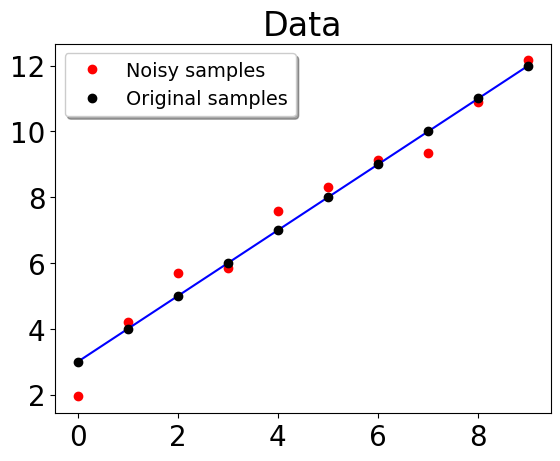

In [3]:
npoints = 10

# Line parameters
m = 1
c = 3

# Noise variance
sigma = 0.6

# Generating the points
x = np.arange(npoints)
yorig = m*x + c
np.random.seed(seed=100)
y = yorig + sigma*np.random.normal(size=npoints)

# Plots

fig = plt.figure()
ax = fig.gca()
cs = ax.plot(x, y,'ro',label='Noisy samples')
cs = ax.plot(x, yorig,'b')
cs = ax.plot(x,yorig,'ko',label='Original samples')
legend = ax.legend(loc='upper left', shadow=True, fontsize='x-small')
cs = plt.title('Data')


## Visualizing the cost and regularization term
Note that we are solving for $y=mx+c$, where $m$ is the slope and $c$ is the y intercept. This equation can be expressed in the matrix form as 
$$ y = \begin{bmatrix}x&1\end{bmatrix}\begin{bmatrix}m\\c\end{bmatrix}$$

When we have multiple equations, we can concatenate the equations into the matrix form as

$$ \underbrace{\begin{bmatrix}y_1\\y_2\\\vdots\\y_n\end{bmatrix}}_{\mathbf y} = \underbrace{\begin{bmatrix}x_1&1\\x_2&1\\\vdots&\vdots\\x_N&1\\\end{bmatrix}}_{\mathbf X}\underbrace{\begin{bmatrix}m\\c\end{bmatrix}}_{\mathbf \theta}$$

Ridge regression relies on the cost function $$\mathbf \theta = \arg \min_{\theta} \|\mathbf X\mathbf \theta-\mathbf y\|^2 + \lambda \|\mathbf \theta\|^2.$$ First let us visualize the cost function $\|\mathbf X\mathbf \theta-\mathbf y\|^2$ and the regularization function $\|\mathbf \theta\|^2$ as a function of $m$ and $c$

## <font color=red> Your task: Complete the code at the assigned section to plot a red + sign at the minimum of the cost function.

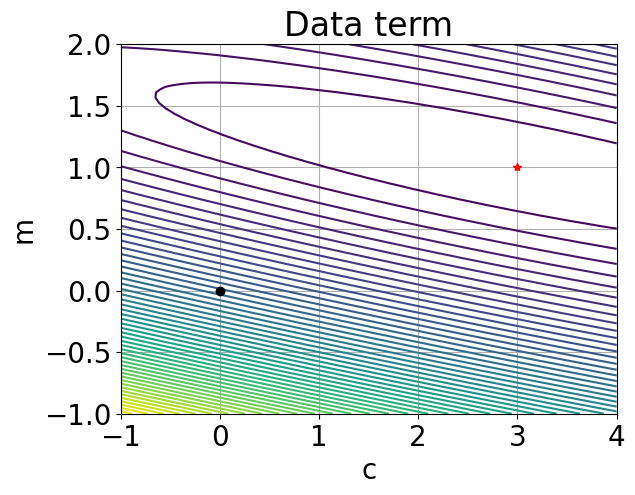

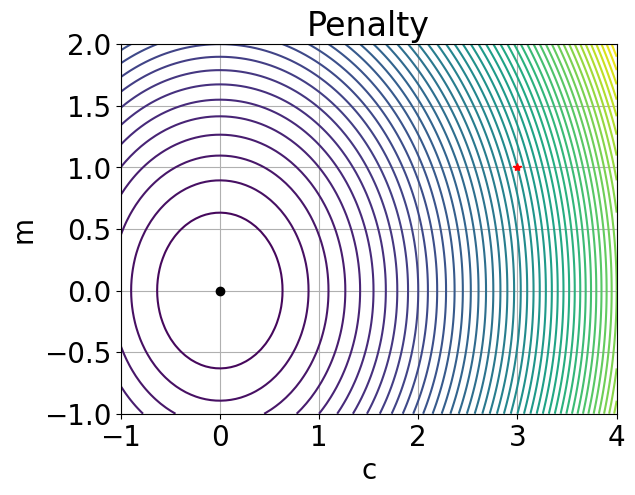

NameError: name 'thetastar' is not defined

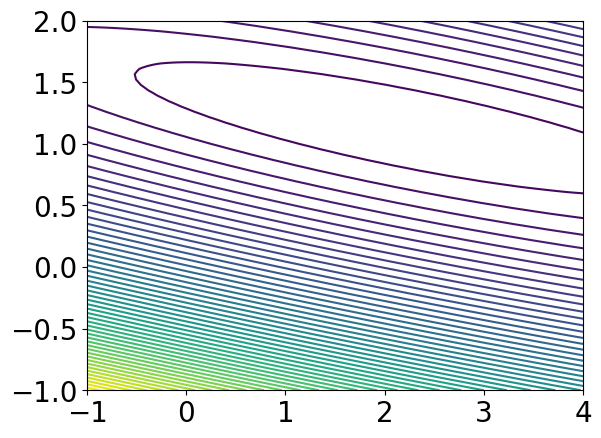

In [13]:

'''
def dataterm(m, c,A,p):
    v = [m,c]
    err = np.matmul(A,v)-p
    return(np.square(np.linalg.norm(err)))
'''
def dataterm(m, c,A,p):
    err = np.zeros((m.shape[0], m.shape[1]))
    for row in range(err.shape[0]):
        for col in range(err.shape[1]):
            err[row][col] = np.square(np.linalg.norm(np.matmul(A, np.vstack((m[row][col], c[row][col]))) - p.reshape(-1, 1)))
    
    return err

def penalty(m, c):
    pen = np.zeros((m.shape[0], m.shape[1]))
    for row in range(pen.shape[0]):
        for col in range(pen.shape[1]):
            pen[row][col] = np.square(np.linalg.norm(np.vstack((m[row][col], c[row][col]))))
    return pen

# system matrix
X = np.column_stack((x,np.ones_like(x)));

maxis = np.linspace(-1, 2, 70)
caxis = np.linspace(-1, 4, 100)
[m,c] = np.meshgrid(maxis,caxis)
datafunction = dataterm(m, c,X,y).T
penaltyfunction = penalty(m, c).T
fig1 = plt.figure()
h = plt.contour(caxis,maxis,datafunction,50)
h = plt.plot(3,1,'r*')
h = plt.plot(0,0,'ko')

plt.ylabel('m')
plt.xlabel('c')
plt.title('Data term')
plt.grid()
plt.show()

fig2 = plt.figure()
h = plt.contour(caxis,maxis,penaltyfunction,50)
h = plt.plot(3,1,'r*')
h = plt.plot(0,0,'ko')

plt.ylabel('m')
plt.xlabel('c')
plt.title('Penalty')
plt.grid()
plt.show()

lam = 1
fig3 = plt.figure()
h = plt.contour(caxis,maxis,datafunction+ lam*penaltyfunction,50)

## Your task; compute the solution to the regularized problem and plot a red + at the minimum
##---------------------------------------------------------------------------------------------

##----------------------------------------------------------------------------------------------
h = plt.plot(thetastar[1],thetastar[0],'r+',label='Min:cost',linewidth=10)
print('Estimated parameters are m=',thetastar[0],' and c=',thetastar[1])
h = plt.plot(3,1,'r*',label='Min: data term')
h = plt.plot(0,0,'ko',label='Min: penalty')

h = plt.ylabel('m')
h = plt.xlabel('c')
h = plt.title('Data term + $\lambda$ penalty')
h = plt.grid()
h = plt.legend()
h = plt.show()



Note that adding the penalty term to the data term brings the minimum closer to the origin, thus reducing the amplitude of the coefficients

## Evaluating the fitted points

We have the fit coefficients in $\mathbf p^*$. We can now compute the value of the points on this line as $y^*=m^*x+c^*$, where $m^*$ is the estimated slope and $c$ is the estimated y intercept. This equation can be expressed in the matrix form as 
$$ y^* = \begin{bmatrix}x&1\end{bmatrix}\underbrace{\begin{bmatrix}m^*\\c^*\end{bmatrix}}_{\mathbf \theta^*}$$

In [ ]:
yfit = np.matmul(X,np.transpose(thetastar))
fig = plt.figure(2)
plt.plot(x, y,'ro',yfit,'r--',yorig)
plt.ylabel('ylabel')
plt.xlabel('xlabel')
plt.show()

NameError: name 'thetastar' is not defined

## Visualizing the $\ell_1$ regularization term

Note that we are solving for $y=mx+c$, where $m$ is the slope and $c$ is the y intercept. This equation can be expressed in the matrix form as 

Ridge regression relies on the cost function $$\mathbf \theta = \arg \min_{\theta} \|\mathbf X\mathbf \theta-\mathbf y\|^2 + \lambda \|\mathbf \theta\|_{\ell_1}.$$ First let us visualize the cost function $\|\mathbf X\mathbf \theta-\mathbf y\|^2$ and the regularization function $\|\mathbf \theta\|_{\ell_1}$ as a function of $m$ and $c$


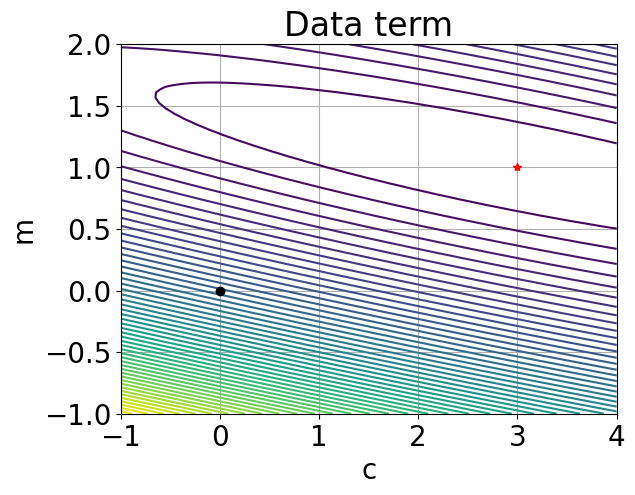

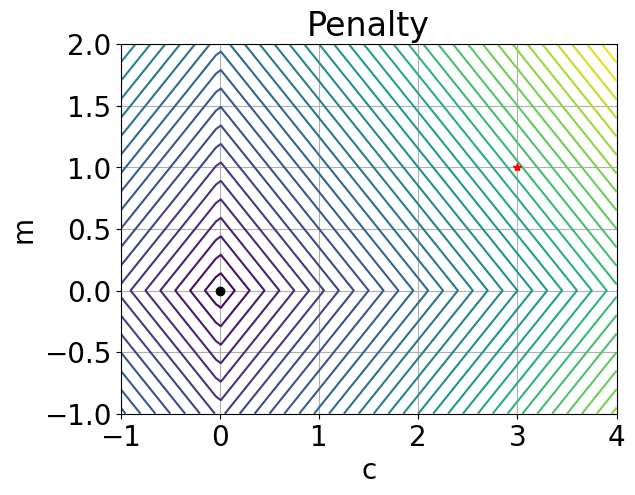

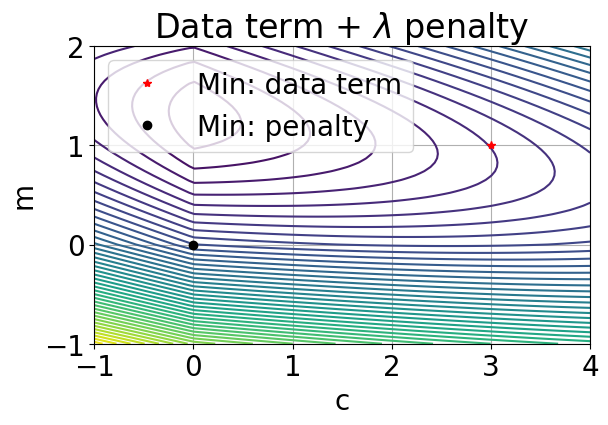

In [17]:
'''
def dataterm(m, c,A,p):
    v = [m,c]
    err = np.matmul(A,v)-p
    return(np.square(np.linalg.norm(err)))
'''
def dataterm(m, c,A,p):
    err = np.zeros((m.shape[0], m.shape[1]))
    for row in range(err.shape[0]):
        for col in range(err.shape[1]):
            err[row][col] = np.square(np.linalg.norm(np.matmul(A, np.vstack((m[row][col], c[row][col]))) - p.reshape(-1, 1)))
    
    return err

def penalty(m, c):
    return(np.abs(m)+np.abs(c))

# system matrix
X = np.column_stack((x,np.ones_like(x)));

maxis = np.linspace(-1, 2, 70)
caxis = np.linspace(-1, 4, 100)
[m,c] = np.meshgrid(maxis,caxis)
datafunction = dataterm(m, c,X,y).T
penaltyfunction = penalty(maxis[:,None], caxis[None,:])
fig1 = plt.figure()
h = plt.contour(caxis,maxis,datafunction,50)
h = plt.plot(3,1,'r*')
h = plt.plot(0,0,'ko')

plt.ylabel('m')
plt.xlabel('c')
plt.title('Data term')
plt.grid()
plt.show()

fig2 = plt.figure()
h = plt.contour(caxis,maxis,penaltyfunction,50)
h = plt.plot(3,1,'r*')
h = plt.plot(0,0,'ko')

plt.ylabel('m')
plt.xlabel('c')
plt.title('Penalty')
plt.grid()
plt.show()

lam = 100
fig3 = plt.figure()
ax2 = fig3.gca()
h = plt.contour(caxis,maxis,datafunction+ lam*penaltyfunction,50)
h = plt.plot(3,1,'r*',label='Min: data term')
h = plt.plot(0,0,'ko',label='Min: penalty')
h = ax2.set_title('Contour plot')
h = ax2.set_aspect('equal')
h = plt.ylabel('m')
h = plt.xlabel('c')
h = plt.title('Data term + $\lambda$ penalty')
h = plt.grid()
h = plt.legend()